In [14]:
import pandas as pd
import wec_grid_class as wg
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [2]:
# Read in case file 
case14 = r"./input_files/case14.raw"

In [3]:
# initalize WEC GRID Object
pf = wg.Wec_grid(case14)


 Reading IC, SBASE, REV, XFRRAT, NXFRAT, BASFRQ...

 Converting RAW data from PSS(R)E 33 to PSS(R)E 34 format
 Starting processing of Case identification data records
 Finished processing of 3 records for Case identification data
 Starting processing of Bus data records
 Finished processing of 14 records for Bus data
 Starting processing of Load data records
 Finished processing of 11 records for Load data
 Starting processing of Fixed shunt data records
 Finished processing of 1 records for Fixed shunt data
 Starting processing of Generator data records
 Finished processing of 5 records for Generator data
 Starting processing of Branch data records
 Finished processing of 17 records for Branch data
 Finished processing of 0 records for System switching device data
 Starting processing of Transformer data records
 Finished processing of 12 records for 3 Transformer data
 Starting processing of Area data records
 Finished processing of 0 records for Area data
 Starting processing of Tw

In [4]:
# Run first Power Flow and get bus values
pf.run_powerflow
pf.get_values(['BASE', 'PU', 'ANGLED', 'P', 'Q'])
print(pf.dataframe)

       Bus  BASE     PU     ANGLED  Type           P          Q
0    BUS 1   0.0  1.060   0.000000     3  232.346268 -16.759069
1    BUS 2   0.0  1.045  -4.980000     2   18.393555  29.763643
2    BUS 3   0.0  1.010 -12.719999     2  -94.275166   5.310905
3    BUS 4   0.0  1.019 -10.330000     1  -47.719318   8.118187
4    BUS 5   0.0  1.020  -8.780000     1   -7.731865  -2.865371
5    BUS 6   0.0  1.070 -14.220000     2  -11.000880   5.264521
6    BUS 7   0.0  1.062 -13.370001     1   -0.245777   0.234765
7    BUS 8   0.0  1.090 -13.360000     2    0.114721  17.326178
8    BUS 9   0.0  1.056 -14.939999     1  -29.305561   3.840285
9   BUS 10   0.0  1.051 -15.100001     1   -9.090860  -5.871971
10  BUS 11   0.0  1.057 -14.790001     1   -3.439518  -1.734084
11  BUS 12   0.0  1.055 -15.070000     1   -6.009285  -1.676000
12  BUS 13   0.0  1.050 -15.159998     1  -13.853797  -6.227429
13  BUS 14   0.0  1.036 -16.040001     1  -14.785610  -4.652751


In [5]:
from IPython.display import IFrame
IFrame(src="https://matpower.app", width='100%', height='600px')

In [6]:
# read in wec gen values (CSV format)
wec_gen_values = pd.read_csv("./input_files/WECgen_data.csv")
wec_gen_values

,time,ibus,machid,pg,qg,qt,qb,vs,ireg,nreg,...,xt,gtap,stat,rmpct,pt,pb,o1,f1,wmod,wpf
0,0,1.0,1.0,NaN,NaN,NaN,NaN,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.5
1,300,1.0,1.0,0.019870,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.019870,0.0,NaN,NaN,2.0,0.5
2,600,1.0,1.0,0.016054,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.016054,0.0,NaN,NaN,2.0,0.5
3,900,1.0,1.0,0.020990,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.020990,0.0,NaN,NaN,2.0,0.5
4,1200,1.0,1.0,0.016094,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.016094,0.0,NaN,NaN,2.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,20400,1.0,1.0,0.021365,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.021365,0.0,NaN,NaN,2.0,0.5
69,20700,1.0,1.0,0.017197,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.017197,0.0,NaN,NaN,2.0,0.5
70,21000,1.0,1.0,0.022581,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.022581,0.0,NaN,NaN,2.0,0.5
71,21300,1.0,1.0,0.020330,0.0,0.05,-0.05,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.020330,0.0,NaN,NaN,2.0,0.5


In [10]:
time = [] 
history_swing = []
history_injection = []
for i in range(len(wec_gen_values)):
    # choose the next time step set point and run the solver 
    print("Time: {}".format(wec_gen_values.iloc[i].time))
    print("P setpoint: {}".format(wec_gen_values.iloc[i].pg))
    pf.dc_injection(3, wec_gen_values.iloc[i].pg)
    #print(pf.dataframe)

    history_swing.append(pf.dataframe.P[0])
    history_injection.append(pf.dataframe.P[2])
    time.append(wec_gen_values.iloc[i].time)
    print("========================")

Time: 0.0
P setpoint: nan

 No power flow data changed for machine "1" at bus 3 [BUS 3             ]

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      4     )    0.0000(      4     )
                                                             0.00000(     10     )   0.00000(      3     )
   1         0.0000(     12     )    0.0000(      5     )
                                                             0.00000(     10     )   0.00000(      9     )
   2         0.0000(     10     )    0.0000(      5     )


 Reached tolerance in 2 iterations

 Largest mismatch:     -0.00 MW     -0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 1                  232.4    332.4     0.0     -16.5*    10.0     0.0
Time: 300.0
P setpoint: 0.0

Time: 5100.0
P setpoint: 0.0243169198502657

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.210752E-01    0.243169E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00001(      3     )
   1         0.0000(      3     )    0.0000(      5     )
                                                             0.00000(      3     )   0.00000(      3     )
   2         0.0000(      4     )    0.0000(      5     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW     -0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 1

Time: 9000.0
P setpoint: 0.0208944325581133

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.264492E-01    0.208944E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0001(      3     )    0.0000(      5     )
                                                             0.00000(      5     )   0.00001(      3     )
   1         0.0000(      3     )    0.0000(      9     )
                                                             0.00000(      3     )   0.00000(      3     )
   2         0.0000(      4     )    0.0000(      4     )


 Reached tolerance in 2 iterations

 Largest mismatch:     -0.00 MW     -0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 1

Time: 14100.0
P setpoint: 0.0187160235309671

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.246685E-01    0.187160E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0001(      3     )    0.0000(      5     )
                                                             0.00000(      5     )   0.00001(      3     )
   1         0.0000(      3     )    0.0000(     10     )
                                                             0.00000(      3     )   0.00000(      3     )
   2         0.0000(      2     )    0.0000(      5     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 6 [BUS 6             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BUS 

Time: 18300.0
P setpoint: 0.017797953325263002

 Power flow data changed for machine "1" at bus 3 [BUS 3             ]:
 X--ORIGINAL--X  X-NEW VALUE--X  DATA ITEM
   0.204902E-01    0.177980E-01  PG

  ITER       DELTAP      BUS         DELTAQ      BUS        DELTA/V/      BUS       DELTAANG      BUS
   0         0.0000(      3     )    0.0000(      4     )
                                                             0.00000(      5     )   0.00000(      3     )
   1         0.0000(      3     )    0.0000(      9     )
                                                             0.00000(      3     )   0.00000(      3     )
   2         0.0000(      2     )    0.0000(      4     )


 Reached tolerance in 2 iterations

 Largest mismatch:      0.00 MW      0.00 Mvar      0.00 MVA at bus 9 [BUS 9             ]
 System total absolute mismatch:                    0.00 MVA

 SWING BUS SUMMARY:
   BUS#-SCT X-- NAME --X BASKV      PGEN     PMAX    PMIN      QGEN     QMAX    QMIN
      1     BU

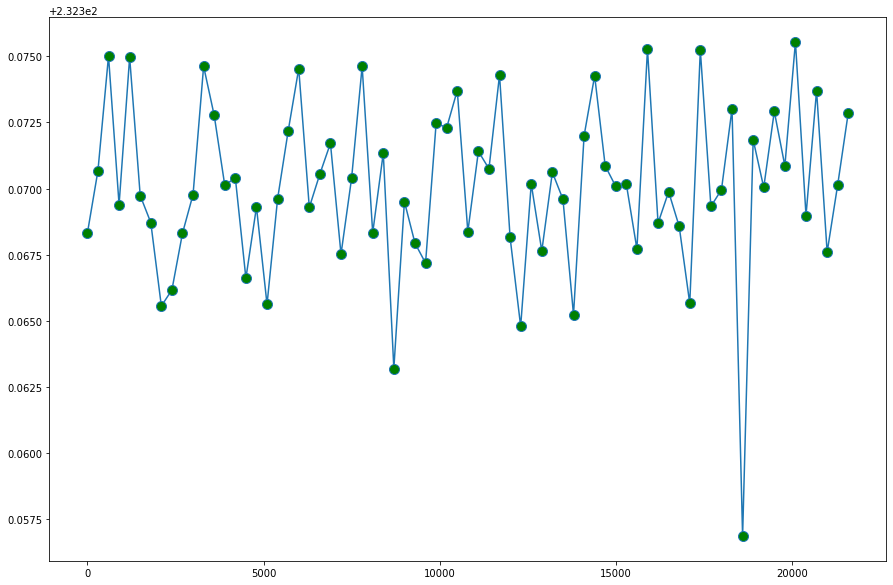

In [15]:
plt.plot(time, history_swing, marker="o", markersize=10, markerfacecolor="green")

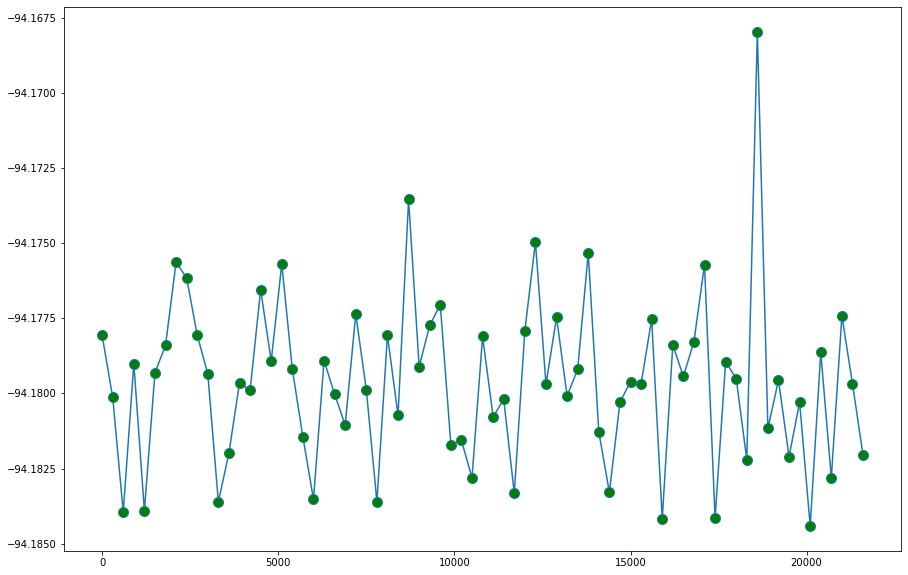

In [16]:
plt.plot(time, history_injection, marker="o", markersize=10, markerfacecolor="green")